In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("white")

import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.exfor.data_utilities as exfor_utils
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
import nucml.model.model_building as model_building
import nucml.model.model_utilities as model_utils
import nucml.general_utilities as gen_utils
import nucml.ace.plotting_utilities as ace_plots

In [45]:
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
importlib.reload(model_building)
importlib.reload(model_utils)
importlib.reload(ace_plots)
print("Finish re-loading scripts.")

Finish re-loading scripts.


In [29]:
figure_dir = "figures/B1/"

In [21]:
sns.set(font_scale=2.5)
sns.set_style('white')

# Gathering Results from Benchmark Calculations

In [22]:
dt_results = ace_utils.gather_benchmark_results("acedata_ml/U233/DT_B1/")

In [38]:
knn_results = ace_utils.gather_benchmark_results("acedata_ml/U233/KNN_B1/")

# Analyzing Decision Tree Results

In [23]:
to_append_dt = pd.read_csv("../ML_EXFOR_neutrons/2_DT/DT_B1/dt_results.csv")
to_append_dt["Model"] = to_append_dt.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_dt = to_append_dt[["Model", "train_mae", "val_mae", "test_mae", "normalizer", "max_depth", "mss", "msl"]]

In [24]:
dt_final = dt_results.merge(to_append_dt, on="Model")

In [34]:
dt_final.sort_values(by="Deviation_Ana").head()

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl
91,DT250_MSS15_MSL1_standard_one_hot_B1_v5,0.999837,0.00136,1.00139,0.00098,0.000163,0.00139,0.079466,0.122913,0.121986,standard,250,15,1.0
181,DT80_MSS10_MSL7_standard_one_hot_B1_v5,0.999775,0.00133,1.00015,0.00095,0.000225,0.00015,0.094590,0.119664,0.118673,standard,80,10,7.0
104,DT280_MSS2_MSL1_standard_one_hot_B1_v5,1.000310,0.00136,1.00317,0.00087,0.000310,0.00317,0.025896,0.135578,0.134513,standard,280,2,1.0
139,DT370_MSS15_MSL1_standard_one_hot_B1_v5,1.000370,0.00129,1.00218,0.00095,0.000370,0.00218,0.079426,0.122893,0.121984,standard,370,15,1.0
35,DT130_MSS15_MSL1_standard_one_hot_B1_v5,1.000780,0.00119,1.00222,0.00099,0.000780,0.00222,0.079635,0.122848,0.121916,standard,130,15,1.0


In [25]:
model_utils.get_best_models_df(dt_final)

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,tag
152,DT400_MSS2_MSL1_standard_one_hot_B1_v5,1.004660,0.00149,1.00450,0.00106,0.004660,0.00450,0.025832,0.135616,0.134573,standard,400,2,1.0,Train
181,DT80_MSS10_MSL7_standard_one_hot_B1_v5,0.999775,0.00133,1.00015,0.00095,0.000225,0.00015,0.094590,0.119664,0.118673,standard,80,10,7.0,Val
11,DT105_MSS10_MSL7_standard_one_hot_B1_v5,1.002660,0.00155,1.00143,0.00090,0.002660,0.00143,0.094585,0.119694,0.118671,standard,105,10,7.0,Test


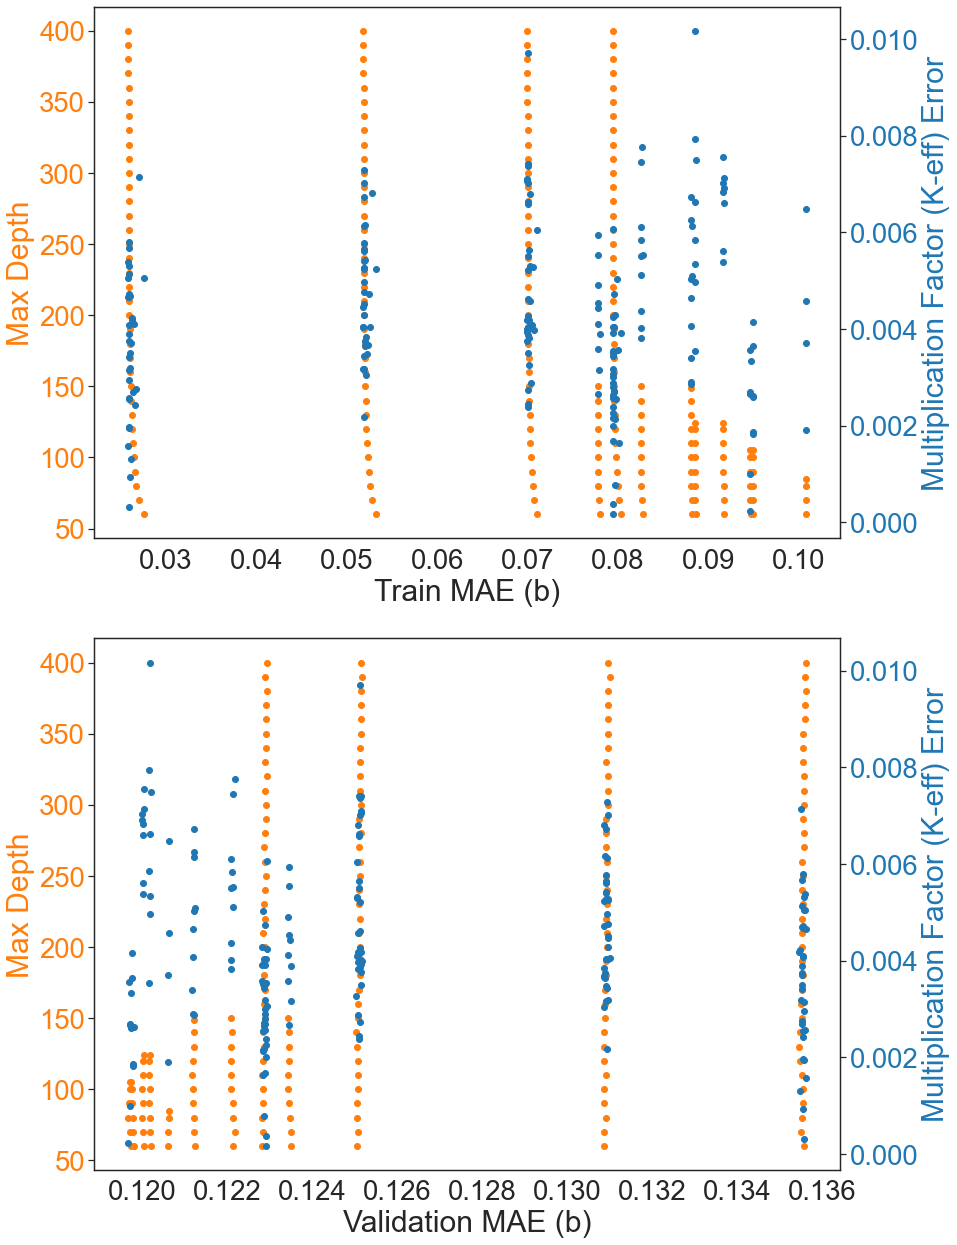

In [33]:
ace_plots.dt_keff_plot(
    dt_final, "train_mae", "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)

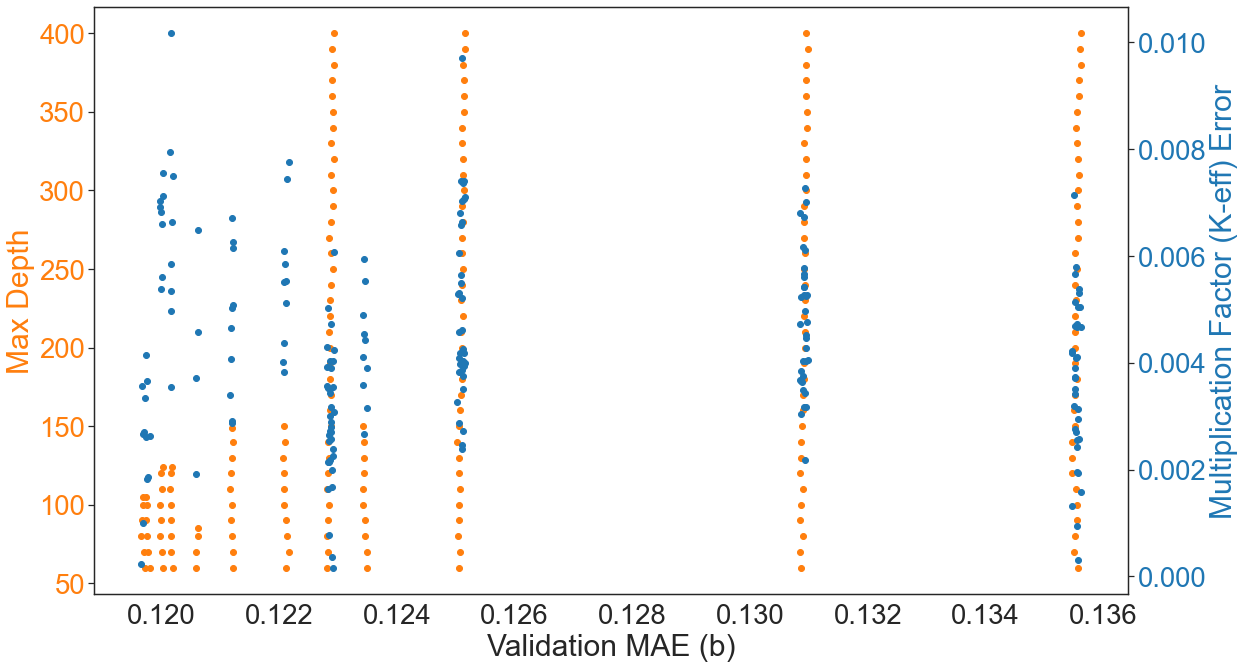

In [37]:
ace_plots.dt_keff_plot(dt_final, "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)

# Analyzing KNN Results

In [39]:
to_append_knn = pd.read_csv("../ML_EXFOR_neutrons/1_KNN/KNN_B1/knn_results.csv")
to_append_knn["Model"] = to_append_knn.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_knn = to_append_knn[["Model", "id", "train_mae", "val_mae", "test_mae", "normalizer", "distance_metric"]]

In [40]:
knn_final = knn_results.merge(to_append_knn, on="Model")

In [41]:
knn_final["k"] = knn_final.Model.apply(lambda x: x.split("_")[0][1:]).astype(int)

In [42]:
knn_final.sort_values(by="Deviation_Ana").head()

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,id,train_mae,val_mae,test_mae,normalizer,distance_metric,k
37,k8_distance_manhattan_robust_one_hot_B1_v1,1.00349,0.00138,1.00376,0.00096,0.00349,0.00376,8,0.025912,0.115873,0.115026,robust,manhattan,8
16,k18_distance_euclidean_robust_one_hot_B1_v1,1.00390,0.00133,1.00554,0.00085,0.00390,0.00554,18,0.025824,0.116137,0.115794,robust,euclidean,18
23,k20_distance_manhattan_robust_one_hot_B1_v1,1.00458,0.00145,1.00575,0.00095,0.00458,0.00575,20,0.025821,0.116302,0.115946,robust,manhattan,20
35,k7_distance_manhattan_robust_one_hot_B1_v1,1.00481,0.00121,1.00498,0.00093,0.00481,0.00498,7,0.025944,0.116187,0.115313,robust,manhattan,7
31,k5_distance_manhattan_robust_one_hot_B1_v1,1.00505,0.00128,1.00382,0.00092,0.00505,0.00382,5,0.026063,0.117412,0.116576,robust,manhattan,5


In [43]:
knn_robust_euclidean = knn_final[(knn_final.distance_metric == "euclidean") & (knn_final.normalizer == "robust")].sort_values(by="k")

In [44]:
model_utils.get_best_models_df(knn_robust_euclidean)

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,id,train_mae,val_mae,test_mae,normalizer,distance_metric,k,tag
22,k20_distance_euclidean_robust_one_hot_B1_v1,1.00756,0.00140,1.00721,0.00092,0.00756,0.00721,20,0.025821,0.116346,0.116008,robust,euclidean,20,Train
2,k11_distance_euclidean_robust_one_hot_B1_v1,1.00653,0.00138,1.00605,0.00103,0.00653,0.00605,11,0.025857,0.115475,0.115103,robust,euclidean,11,Val
36,k8_distance_euclidean_robust_one_hot_B1_v1,1.01025,0.00123,1.00864,0.00084,0.01025,0.00864,8,0.025912,0.115899,0.114987,robust,euclidean,8,Test


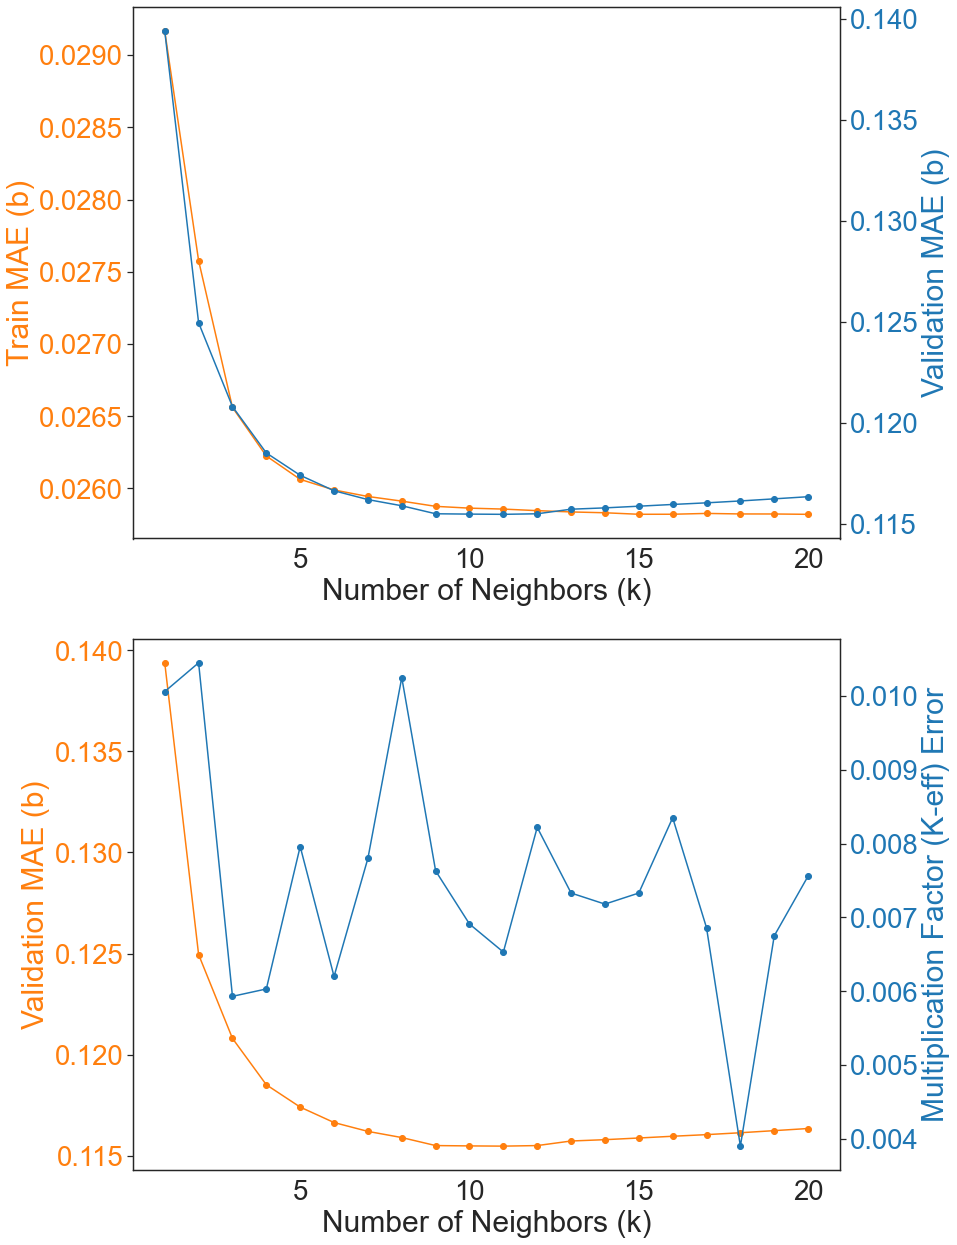

In [47]:
ace_plots.knn_dual_plot(
    knn_robust_euclidean, "k", "train_mae", "val_mae", "Deviation_Ana", save=True, saving_dir=figure_dir)

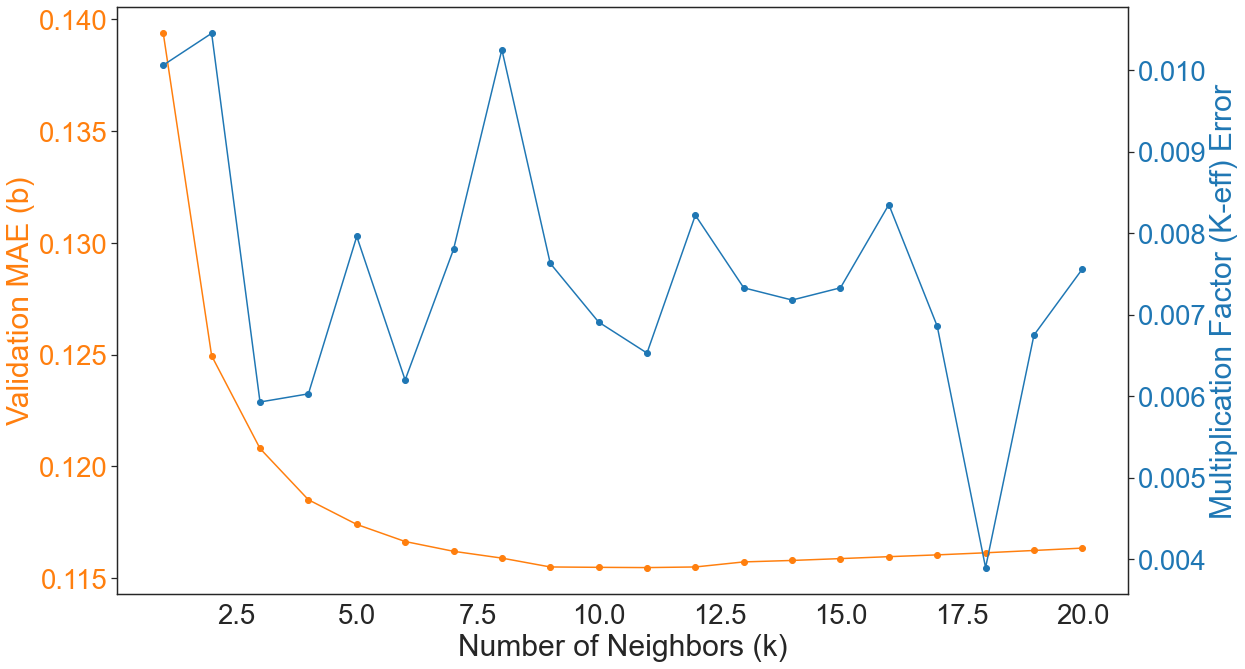

In [48]:
ace_plots.knn_keff_plot(
    knn_robust_euclidean, "k", "val_mae", "Deviation_Ana", save=True, saving_dir=figure_dir)